# Complex Landscape

Setting up a landscape with different point types follows the same general steps as the ones before. First, we load our libraries:

In [1]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
import pandas as pd
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('complexLanscape', './out/')
srv.makeFolder(OUT_PTH)

Now, we manually setup our points but this time we assign a third characteristic to them: a point-type. We can imagine that point types `0` are aquatic habitats whereas point types `1` are blood-haunts (though the numbering is arbitrary and set by our needs):

In [2]:
pts = [
    [-4.0, 4.00, 0], 
    [0.25, 8.00, 1], 
    [5.00, 0.15, 0],
    [-1.0, 1.00, 0],
    [3.00, 3.00, 1]
]
points = pd.DataFrame(pts, columns=['x', 'y', 't'])

Additionally, we have to setup our "masking matrix", in which we define the tendency of a mosquito to move from aquatic habitats to blood haunts and viceversa given equal base probabilities:

In [3]:
msk = [
    [0.20, 0.80],   # [Aquatic to Aquatic,   Aquatic to Bloodhaunt]
    [0.95, 0.05]    # [Bloodhaunt to Aquatic, Bloodhaunt to Bloodhaunt]
]

Once again, we setup our traps as we did in the previous example, with the main difference that this time we will be adding traps with two different attractiveness kernels (mapped to the trap by the dictionary key):

In [4]:
trp = [
    [5.00, 2.00, 1, 0],
    [-2.0, 2.00, 0, 0],
    [10.0, 0.00, 0, 1],
]
traps = pd.DataFrame(trp, columns=['x', 'y', 't', 'f'])
tker = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': 0.4, 'b': .5}},
    1: {'kernel': srv.sigmoidDecay,     'params': {'A': .6, 'rate': 1, 'x0': 0}}
}

It's worth noting that [MGSurvE](https://github.com/Chipdelmal/MGSurvE) can also accommodate situations in which traps attract mosquitoes differently according to the type of the resource they were just in. This was coded into the framework to simulate more complex devices such as ovitraps or sugar baits. For more information on setting these up, have a look at our [documentation's demo](https://chipdelmal.github.io/MGSurvE/build/html/OT_trapMask.html).

With our traps in place, we are ready to instantiate our landscape object:

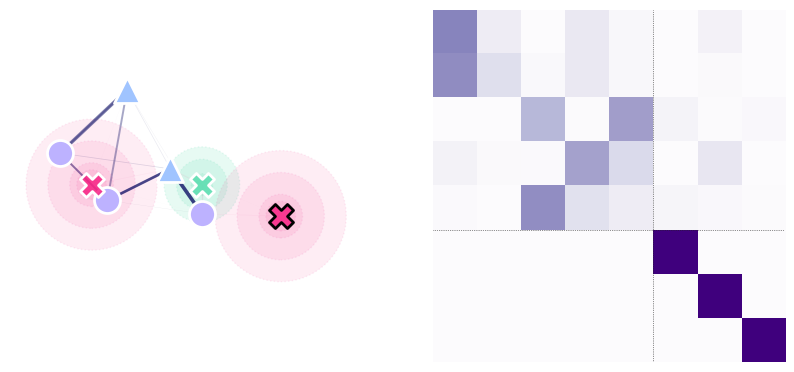

In [5]:
# Land creation ---------------------------------------------------------------
lnd = srv.Landscape(
    points, maskingMatrix=msk, 
    traps=traps, trapsKernels=tker
)
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(10, 10), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMaskedMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
[srv.plotClean(fig, i, frame=False) for i in ax]
fig.savefig(
    os.path.join(OUT_PTH, '{}.png'.format(ID)), 
    facecolor='w', bbox_inches='tight', pad_inches=0.1, dpi=150
)

<hr>

# More Information

* [Quickstart](https://chipdelmal.github.io/MGSurvE/build/html/Quickstart.html)
* [Landscape Creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html)
* Doc's Examples: [creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html), [update](https://chipdelmal.github.io/MGSurvE/build/html/landscapeUpdate.html), [complex](https://chipdelmal.github.io/MGSurvE/build/html/landscapeTraps.html)
* ["Continuous Optimization Demo" with Different Point Types](../optimization/continuous.ipynb)
* ["Stage-Specific Traps" on MGSurvE's Documentation](https://chipdelmal.github.io/MGSurvE/build/html/OT_trapMask.html)
* ["GA with Sex Kernels" on MGSurvE's Documentation](https://chipdelmal.github.io/MGSurvE/build/html/GA_complex.html)